## **Part 5: Python/Pandas Implementation**

### Task 5.1: Database Connection
Write Python code to connect to the PostgreSQL database using `psycopg2` or `SQLAlchemy`.

In [2]:
# importing necessary libraries
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import matplotlib.pyplot as plt

# Configuring connection to `library_db` database
USER = "postgres"
PASS = quote_plus("@user56") 
HOST = "localhost"
PORT = "5432"
DB = "library_db"

engine = create_engine(f'postgresql://{USER}:{PASS}@{HOST}:{PORT}/{DB}')


In [3]:
# loading the data and testing the connection
authors = pd.read_sql("SELECT * FROM Authors", engine)
books = pd.read_sql("SELECT * FROM Books", engine)
book_orders = pd.read_sql("SELECT * FROM BookOrders", engine)
members = pd.read_sql("SELECT * FROM Members", engine)
borrow_history = pd.read_sql("SELECT * FROM BorrowHistory", engine)
departments = pd.read_sql("SELECT * FROM Departments", engine)
library_staff = pd.read_sql("SELECT * FROM LibraryStaff", engine)

In [4]:
# previewing the first 5 rows
authors.head()

,author_id,author_name,country_of_origin,number_of_books_written
0,1,Margaret Atwood,Canada,23
1,2,Haruki Murakami,Japan,18
2,3,Chimamanda Ngozi Adichie,Nigeria,7
3,4,Elena Ferrante,Italy,12
4,5,Salman Rushdie,India,19


### Task 5.2: Query Translation
Translate the following SQL queries into Pandas equivalents:

1. Query from Q3 (Book count per author)
2. Query from Q7 (Top 5 most borrowed books)
3. Query from Q9 (Average available copies per genre)
4. Query from Q12 (Monthly borrowing trends)
5. One advanced query of your choice from Q11-Q15

**Q3.** Display the total number of books written by each author, ordered by count (descending).

In [5]:
# printing all the columns in the author table
authors.columns

Index(['author_id', 'author_name', 'country_of_origin',
       'number_of_books_written'],
      dtype='object')

In [6]:
# selecting the columns to be displayed as a table
author_books = authors[["author_id","author_name","number_of_books_written"]]

# sorting by number_of_books_written in descending order
no_of_books_written = author_books.sort_values(by="number_of_books_written", ascending=False)
no_of_books_written

,author_id,author_name,number_of_books_written
43,44,Isaac Asimov,500
10,11,Agatha Christie,85
8,9,Stephen King,64
44,45,Philip K. Dick,44
37,38,Terry Pratchett,41
36,37,Neil Gaiman,35
45,46,Arthur C. Clarke,33
11,12,Paulo Coelho,30
39,40,Brandon Sanderson,28
46,47,Ray Bradbury,27



**Q7.** Find the top 5 most borrowed books along with the number of times each has been borrowed.

In [7]:
# printing the column names in book table
books.columns

Index(['book_id', 'title', 'author_id', 'genre', 'date_of_publication',
       'publisher', 'isbn', 'language_', 'available_copies', 'age_rating'],
      dtype='object')

In [8]:
# printing the column names in the borrow_history table
borrow_history.columns

Index(['borrowed_id', 'book_id', 'member_id', 'borrow_date', 'return_date'], dtype='object')

In [9]:
# merging the borrow_histroy table and books table
books_borrow_history = pd.merge(books,borrow_history, on = "book_id", how = "inner")
books_borrow_history.head()

,book_id,title,author_id,genre,date_of_publication,publisher,isbn,language_,available_copies,age_rating,borrowed_id,member_id,borrow_date,return_date
0,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,1,1,2024-01-15,2024-02-05
1,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,55,50,2024-03-22,None
2,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,144,64,2024-03-28,None
3,2,Cat's Eye,1,Literary Fiction,1988-09-01,McClelland & Stewart,9780771008801,English,2,16+,2,3,2024-02-10,2024-03-02
4,2,Cat's Eye,1,Literary Fiction,1988-09-01,McClelland & Stewart,9780771008801,English,2,16+,60,55,2024-03-28,None


In [10]:
top_5_borrowed = books_borrow_history.groupby("book_id")["title"].value_counts().sort_values(ascending=False).head(5)
top_5_borrowed

book_id  title                                   
1        The Handmaid's Tale                         3
2        Cat's Eye                                   3
30       Harry Potter and the Philosopher's Stone    3
4        Norwegian Wood                              2
26       It                                          2
Name: count, dtype: int64

In [11]:
#top 5 most borrowed books along with the number of times each has been borrowed.
top_5_borrowed = (books_borrow_history.groupby(["book_id", "title"]).size().reset_index(name="borrow_count").sort_values(by="borrow_count", ascending=False).head(5))

top_5_borrowed


,book_id,title,borrow_count
0,1,The Handmaid's Tale,3
1,2,Cat's Eye,3
29,30,Harry Potter and the Philosopher's Stone,3
3,4,Norwegian Wood,2
25,26,It,2


**Q9.** Show the average number of available copies per genre.

In [12]:
# checking the columns
books.columns

Index(['book_id', 'title', 'author_id', 'genre', 'date_of_publication',
       'publisher', 'isbn', 'language_', 'available_copies', 'age_rating'],
      dtype='object')

In [13]:
# Show the average number of available book copies per genre.
avg_copies_per_genre = (books.groupby("genre")["available_copies"]).mean().reset_index(name="avg_available_copies").sort_values(by="avg_available_copies", ascending=True)
avg_copies_per_genre.round(2)

,genre,avg_available_copies
2,Essay,1.00
8,Magical Realism,1.75
7,Literary Fiction,1.81
5,Historical Mystery,2.00
12,Philosophical Fiction,2.00
13,Post-apocalyptic,2.00
0,Children's Literature,2.00
4,Historical Fiction,2.33
6,Horror,2.50
15,Science,2.50


**Q12.** Generate a report showing monthly borrowing trends for the past year (count of books borrowed per month).

In [14]:
# converting borrow_date to pandas datetime
books_borrow_history["borrow_date"] = pd.to_datetime(books_borrow_history["borrow_date"])

In [15]:
# Extracting the borrow year and month from the borrow_date column
books_borrow_history["borrow_year"] = books_borrow_history["borrow_date"].dt.year
books_borrow_history["borrow_month"] = books_borrow_history["borrow_date"].dt.month_name()

In [16]:
# Grouping and counting borrows per month
monthly_trends = (books_borrow_history.groupby(["borrow_year","borrow_month"]).size().reset_index(name="total_borrowed_books").sort_values( by="total_borrowed_books", ascending= True))
monthly_trends

,borrow_year,borrow_month,total_borrowed_books
1,2024,January,32
0,2024,February,58
2,2024,March,60


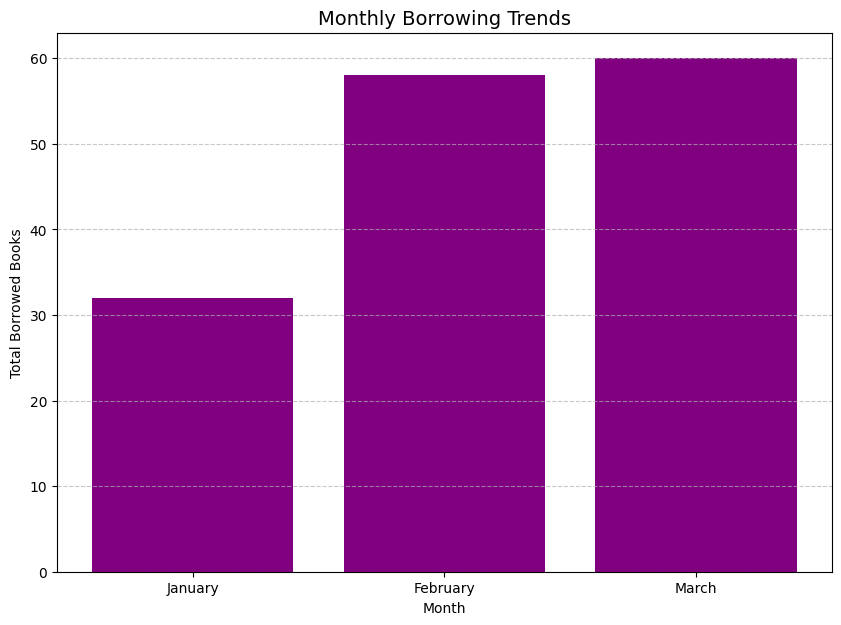

In [17]:
# Plotting monthly borrowing trends
plt.figure(figsize=(10, 7))
plt.bar(monthly_trends["borrow_month"], monthly_trends["total_borrowed_books"], color="purple")

plt.title("Monthly Borrowing Trends", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Borrowed Books")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q14. Calculate the total revenue from book orders per supplier, showing only suppliers with orders exceeding $5,000.

In [18]:
# Calculating total revenue from book orders by supplier
book_orders["total_revenue"] = (book_orders["cost"] * book_orders["quantity"]) 

In [21]:
# grouping by supplier name and summing the total revenue
supplier_revenue = (book_orders.groupby("supplier_name")["total_revenue"].sum().reset_index())
supplier_revenue

,supplier_name,total_revenue
0,Agatha Christie Ltd,59.95
1,Algonquin Books,103.50
2,Baker & Taylor,64.95
3,Bantam Spectra,199.90
4,Bloomsbury,473.26
5,Bobbs-Merrill,71.00
6,Bompiani,51.75
7,Broadway Books,89.94
8,Cassell,85.75
9,Colin Smythe,103.92


In [ ]:
#filtering suppliers with total revenue > 5000
supplier_revenue = supplier_revenue[supplier_revenue["total_revenue"] > 5000]

#sorting by total_revenue in descending order
supplier_revenue = supplier_revenue.sort_values(by="total_revenue", ascending=False)

,supplier_name,total_revenue
